In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
from scipy import stats


In [4]:
 covariates = pd.read_csv('/storage/polo/GTEx_v8_matrix_eQTL/run2_GTEx_v8_Euro_only_PEER/Adipose-Subcutaneous_Euro/chr1_covariance_intersect.tsv', sep='\t', index_col=0)

In [7]:
covariates.T

id,SEX,AGE,PC1_178.652,PC2_119.536,PC3_31.844,PC4_11.937,PC5_7.826,PC6_7.463,PC7_6.971,PC8_6.877,PC9_6.644,PC10_6.431
GTEX-111CU,1.0,57.0,-0.0002,0.0235,-0.0056,0.0159,0.0065,-0.0123,-0.0027,0.0136,0.0205,-0.0019
GTEX-111FC,1.0,61.0,-0.0018,0.0245,-0.0029,0.0158,0.0030,-0.0072,-0.0076,-0.0366,-0.0009,0.0302
GTEX-111VG,1.0,63.0,-0.0008,0.0238,-0.0051,0.0049,-0.0441,0.0225,0.0035,-0.0069,-0.0204,0.0112
GTEX-111YS,1.0,62.0,0.0020,0.0252,0.0045,0.0129,-0.0049,-0.0057,-0.0092,0.0371,-0.0096,-0.0133
GTEX-1122O,2.0,64.0,-0.0003,0.0246,-0.0023,0.0096,0.0212,-0.0103,0.0043,-0.0214,0.0063,0.0125
...,...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYT6,1.0,30.0,-0.0003,0.0234,-0.0069,0.0055,0.0066,-0.0222,-0.0263,-0.0033,-0.0104,-0.0092
GTEX-ZYVF,2.0,54.0,-0.0015,0.0237,-0.0095,0.0016,-0.0114,-0.0181,0.0038,-0.0054,-0.0121,-0.0079
GTEX-ZYY3,2.0,67.0,-0.0024,0.0197,0.0004,-0.0040,-0.0142,-0.0099,-0.0015,0.0029,-0.0033,-0.0054
GTEX-ZZ64,1.0,24.0,0.0009,0.0223,0.0028,-0.0141,0.0185,-0.0067,0.0153,-0.0088,0.0149,-0.0108


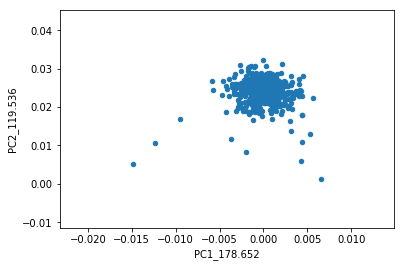

In [11]:
covariates.T.plot.scatter(x = 'PC1_178.652', y = 'PC2_119.536')

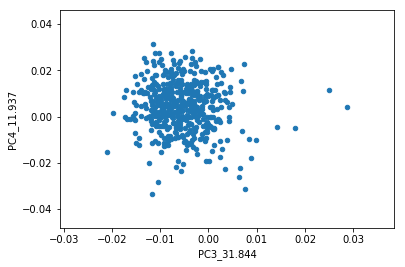

In [12]:
covariates.T.plot.scatter(x = 'PC3_31.844', y = 'PC4_11.937')

In [14]:
?covariates.T.plot.hist()

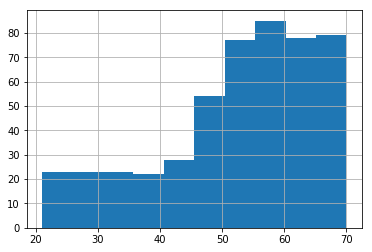

In [16]:
covariates.T.AGE.hist()

In [72]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr1/CPMA/gene-snp_eqtls_empiricalpvalues_chr1_converted', sep='\t')

In [73]:
data

,snp,cpma,pvalue
0,chr1_100007048,1.067542,0.950184
1,chr1_100110377,257.226857,0.329001
2,chr1_100133310,4.186443,0.901352
3,chr1_100206504,176.663141,0.419093
4,chr1_100484304,56.436950,0.650165
...,...,...,...
2250,chr1_98953091,152.600027,0.453367
2251,chr1_9922329,393.789745,0.226272
2252,chr1_99870805,818.347138,0.081502
2253,chr1_99892547,128.856986,0.491703


In [74]:
pvals = np.array(data['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [75]:
sum(pvals_adj[0])

1

In [76]:
min(pvals)

1.5999968000064e-05

In [77]:
np.argmin(pvals)

104

In [58]:
pvals.sort()

In [59]:
pvals[1:]

array([9.11998176e-04, 4.13199174e-03, 5.21198958e-03, ...,
       9.99474001e-01, 9.99532001e-01, 9.99842000e-01])

In [60]:
pvals_adj_filter = statsmodels.stats.multitest.multipletests(pvals[1:], alpha=0.5, method='holm')

In [61]:
sum(pvals_adj_filter[0])

0

In [62]:
np.argmin(pvals_adj_filter[1])

0

In [78]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.07911123246489649, pvalue=1.0085361917563234e-12)

Text(0, 0.5, 'count')

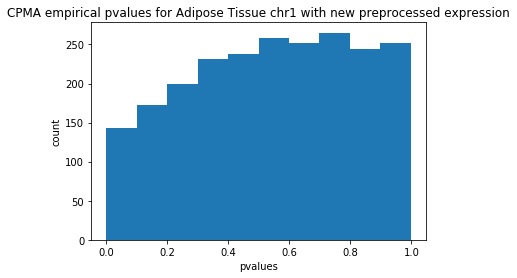

In [82]:
plt.hist(pvals)
plt.title('CPMA empirical pvalues for Adipose Tissue chr1 with new preprocessed expression')
plt.xlabel('pvalues')
plt.ylabel('count')

In [87]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run2_031621/Nerve-Tibial_Euro/chr1/gene-snp_eqtls_empiricalpvalues_chr1_converted', sep='\t')

In [88]:
pvals = np.array(data['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [89]:
sum(pvals_adj[0])

0

In [90]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.10249060558753043, pvalue=7.107437156251278e-21)

Text(0, 0.5, 'count')

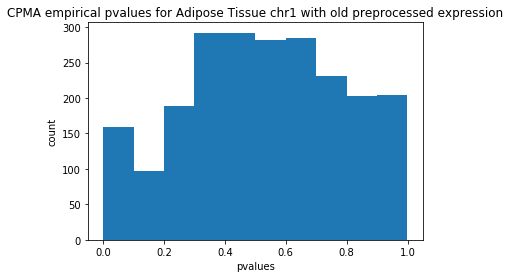

In [86]:
plt.hist(pvals)
plt.title('CPMA empirical pvalues for Adipose Tissue chr1 with old preprocessed expression')
plt.xlabel('pvalues')
plt.ylabel('count')

In [166]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/chr1/CPMA/gene-snp_eqtls_empiricalpvalues_chr1_converted', sep='\t')
pvals = np.array(data['pvalue'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [167]:
sum(pvals_adj[0])

2

In [168]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.06177528352511591, pvalue=7.51370130128672e-08)

Text(0, 0.5, 'count')

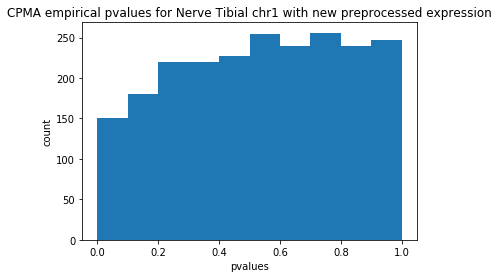

In [169]:
plt.hist(pvals)
plt.title('CPMA empirical pvalues for Nerve Tibial chr1 with new preprocessed expression')
plt.xlabel('pvalues')
plt.ylabel('count')

In [94]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr1/matrixeqtl/matrixeQTL_results_chr1_factors.gz', sep='\t')

In [95]:
data

,SNP,gene,beta,t-stat,p-value,FDR
0,chr1_248323998,V2,-0.243548,-3.847850,0.000135,0.867994
1,chr1_66770414,V5,-0.326424,-3.593284,0.000360,0.867994
2,chr1_248349335,V2,-0.222217,-3.488979,0.000530,0.867994
3,chr1_63323280,V4,-0.306656,-3.477301,0.000553,0.867994
4,chr1_19683244,V2,0.327067,3.398385,0.000735,0.867994
...,...,...,...,...,...,...
11280,chr1_78492806,V4,0.000102,0.000967,0.999229,0.999583
11281,chr1_186132407,V4,0.000057,0.000764,0.999391,0.999656
11282,chr1_201999954,V5,0.000013,0.000192,0.999847,0.999896
11283,chr1_248039042,V6,0.000013,0.000133,0.999894,0.999896


In [96]:
pvals = np.array(data['p-value'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')

In [97]:
sum(pvals_adj[0])

0

In [98]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.0070530502760063896, pvalue=0.628426831090628)

Text(0, 0.5, 'count')

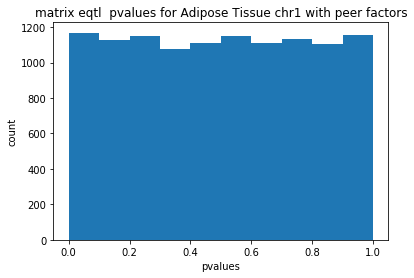

In [99]:
plt.hist(pvals)
plt.title('matrix eqtl  pvalues for Adipose Tissue chr1 with peer factors')
plt.xlabel('pvalues')
plt.ylabel('count')

In [100]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr1/matrixeqtl/matrixeQTL_results_chr1.gz', sep='\t')
pvals = np.array(data['p-value'])
pvals_adj = statsmodels.stats.multitest.multipletests(pvals, alpha=0.25, method='holm')
sum(pvals_adj[0])

0

In [101]:
stats.kstest(pvals, 'uniform')

KstestResult(statistic=0.0014246242564381895, pvalue=6.160530120990648e-68)

Text(0, 0.5, 'count')

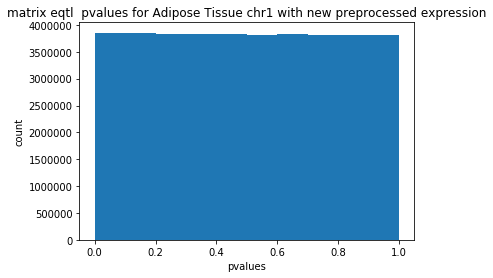

In [102]:
plt.hist(pvals)
plt.title('matrix eqtl  pvalues for Adipose Tissue chr1 with new preprocessed expression')
plt.xlabel('pvalues')
plt.ylabel('count')

In [65]:
genotype = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr1/chr1_SNP_intersect.tsv', sep='\t', index_col=0)

In [66]:
genotype

,GTEX-1LSNL,GTEX-YJ8O,GTEX-17HGU,GTEX-1I4MK,GTEX-1CAMR,GTEX-1I6K7,GTEX-QCQG,GTEX-U8XE,GTEX-1QEPI,GTEX-R3RS,...,GTEX-16MT8,GTEX-1MA7X,GTEX-QEL4,GTEX-13FTW,GTEX-1L5NE,GTEX-1A3MV,GTEX-P4PQ,GTEX-1QAET,GTEX-ZPCL,GTEX-1ICLY
id,,,,,,,,,,,,,,,,,,,,,
chr1_946247,1,1,1,2,1,2,0,1,2,1,...,1,0,0,1,1,2,1,2,1,2
chr1_965125,1,0,1,0,1,0,1,0,0,1,...,0,1,2,1,1,0,1,0,1,0
chr1_973858,1,0,0,2,2,0,1,1,1,1,...,2,1,2,2,1,1,0,1,1,1
chr1_973929,0,0,0,1,1,0,1,0,0,0,...,0,0,2,0,1,0,0,0,0,0
chr1_974039,1,2,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr1_248681658,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
chr1_248681796,2,2,2,1,2,2,2,2,2,1,...,2,2,2,1,2,2,2,2,2,2
chr1_248682055,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [69]:
genotype.loc['chr1_111241360']

,GTEX-1LSNL,GTEX-YJ8O,GTEX-17HGU,GTEX-1I4MK,GTEX-1CAMR,GTEX-1I6K7,GTEX-QCQG,GTEX-U8XE,GTEX-1QEPI,GTEX-R3RS,...,GTEX-16MT8,GTEX-1MA7X,GTEX-QEL4,GTEX-13FTW,GTEX-1L5NE,GTEX-1A3MV,GTEX-P4PQ,GTEX-1QAET,GTEX-ZPCL,GTEX-1ICLY
id,,,,,,,,,,,,,,,,,,,,,
chr1_111241360,0,0,0,1,1,0,1,1,1,2,...,0,1,0,0,1,1,0,0,0,1
chr1_111241360,0,1,1,1,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0


In [70]:
genotype = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr2/chr2_SNP_intersect.tsv', sep='\t', index_col=0)

In [71]:
genotype.loc['chr2_176169393']

GTEX-139TT    0
GTEX-1C6VQ    1
GTEX-1B932    0
GTEX-1L5NE    2
GTEX-XQ8I     0
             ..
GTEX-1AX9K    0
GTEX-17EVP    0
GTEX-REY6     1
GTEX-ZQG8     0
GTEX-16BQI    2
Name: chr2_176169393, Length: 491, dtype: int64

In [91]:
data = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/chr1/CPMA/gene-snp_eqtls_cpma-mix_converted_chr1', sep='\t')

(array([  22.,   24.,   24.,   16.,  310.,   30.,   55.,   65.,   51.,
        1658.]),
 array([0.0211462 , 0.11903158, 0.21691696, 0.31480234, 0.41268772,
        0.5105731 , 0.60845848, 0.70634386, 0.80422924, 0.90211462,
        1.        ]),
 <a list of 10 Patch objects>)

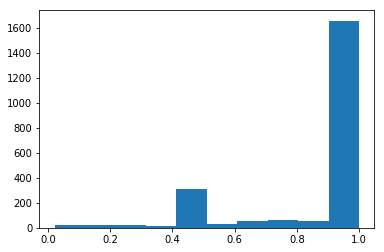

In [92]:
plt.hist(np.array(data['predicted_T']))


In [108]:
data = pd.read_csv('/storage/polo/GTEx_v8_1000_genotypePCA/GTEx_1KG_merged.gtex.pca.evec', sep='\s*', index_col=0)


/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/pandas/io/parsers.py:2420: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/pandas/io/parsers.py:2423: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [109]:
data

,#eigvals:,42.777,4.607,4.453,4.192,4.106,3.953,3.884,3.787,3.691,3.659
GTEX-1A3MV,0.0184,-0.0259,0.0706,0.0026,0.0346,0.0338,0.0470,-0.0476,0.0564,0.0238,European
GTEX-1A3MW,0.0097,-0.0067,-0.0396,-0.0461,-0.0216,0.0203,0.0383,-0.0340,-0.0561,-0.0399,European
GTEX-1A3MX,0.0146,0.0531,0.0050,0.0544,-0.0096,0.0432,-0.0698,0.0435,-0.0230,0.0036,European
GTEX-1A8FM,0.0132,-0.0011,0.0218,0.0174,-0.0662,0.0045,-0.0294,0.0420,-0.0098,-0.0299,European
GTEX-1A8G6,0.0129,0.0361,0.0097,0.0114,0.0281,-0.0085,0.0384,0.0310,0.0526,-0.0170,European
...,...,...,...,...,...,...,...,...,...,...,...
NA21601,-0.0867,0.0133,-0.0251,-0.0002,0.0054,0.0231,-0.0099,0.0072,0.0306,0.0007,NaN
NA21608,-0.0916,0.0052,0.0105,0.0281,-0.0036,0.0164,-0.0134,-0.0181,0.0037,-0.0482,NaN
NA21636,-0.0774,0.0041,-0.0209,0.0321,-0.0028,0.0148,-0.0083,0.0070,0.0138,-0.0233,NaN
NA21648,-0.0801,-0.0168,-0.0280,-0.0042,-0.0122,0.0075,0.0082,0.0117,0.0415,-0.0157,NaN


In [117]:
set(data['3.659'])

{'AfricanAmerican', 'Amerindian', 'Asian', 'European', 'Unknown', nan}

In [142]:
colors = []
trans = []
for sample in data['3.659']:
    if sample == 'European':
        colors.append('red')
        trans.append(1)
    elif sample == 'Amerindian':
        colors.append('gold') 
        trans.append(1)
    elif sample == 'Asian':
        colors.append('green')
        trans.append(1)
    elif sample == 'AfricanAmerican':
        colors.append('blue')
        trans.append(1)
    elif sample == 'Unknown':
        colors.append('purple')
        trans.append(1)
    else:
        colors.append('gray')
        trans.append(0)
    

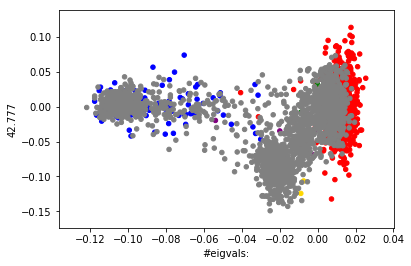

In [130]:
data.plot.scatter(x='#eigvals:', y='42.777', c=colors)

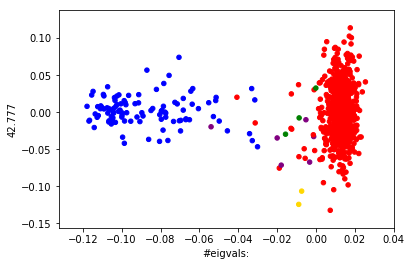

In [163]:
data[:856].plot.scatter(x='#eigvals:', y='42.777', c=colors[:856])

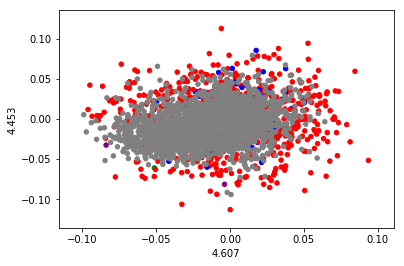

In [165]:
data.plot.scatter(x='4.607', y='4.453', c=colors)

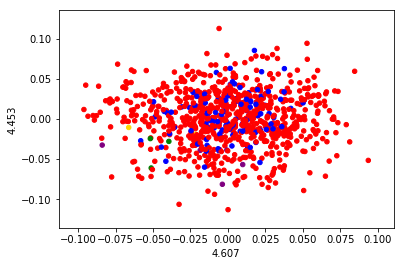

In [164]:
data[:856].plot.scatter(x='4.607', y='4.453', c=colors[:856])

In [162]:
data[:856]

,#eigvals:,42.777,4.607,4.453,4.192,4.106,3.953,3.884,3.787,3.691,3.659
GTEX-1A3MV,0.0184,-0.0259,0.0706,0.0026,0.0346,0.0338,0.0470,-0.0476,0.0564,0.0238,European
GTEX-1A3MW,0.0097,-0.0067,-0.0396,-0.0461,-0.0216,0.0203,0.0383,-0.0340,-0.0561,-0.0399,European
GTEX-1A3MX,0.0146,0.0531,0.0050,0.0544,-0.0096,0.0432,-0.0698,0.0435,-0.0230,0.0036,European
GTEX-1A8FM,0.0132,-0.0011,0.0218,0.0174,-0.0662,0.0045,-0.0294,0.0420,-0.0098,-0.0299,European
GTEX-1A8G6,0.0129,0.0361,0.0097,0.0114,0.0281,-0.0085,0.0384,0.0310,0.0526,-0.0170,European
...,...,...,...,...,...,...,...,...,...,...,...
GTEX-ZYWO,0.0087,-0.0296,-0.0040,0.0097,-0.0014,0.0116,-0.0041,0.0282,-0.0175,0.0975,European
GTEX-ZYY3,0.0026,-0.0051,-0.0119,-0.0692,0.0352,-0.0191,-0.0632,-0.0037,-0.0073,-0.0586,European
GTEX-ZZ64,0.0147,-0.0317,-0.0431,0.0117,-0.0463,0.0345,0.0027,-0.0215,-0.0590,-0.0243,European
GTEX-ZZPT,0.0169,-0.0618,-0.0795,0.0236,0.0821,0.0702,0.0046,-0.0287,-0.0053,-0.0195,European


In [23]:
adipose = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/matrixeQTL_PCs_sig_results_factors_pairwise', sep='\t', index_col=0)
nerve = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/matrixeQTL_PCs_sig_results_factors_pairwise', sep='\t', index_col=0)


In [24]:
intersect = pd.merge(nerve, adipose, left_index=True, right_index=True)


In [180]:
intersect

,gene_x,beta_x,t-stat_x,p-value_x,FDR_x,gene_y,beta_y,t-stat_y,p-value_y,FDR_y
SNP,,,,,,,,,,
chr10_101580387,V2,0.163757,2.257405,0.024478,0.97004,V6,-0.201250,-2.976140,0.003067,0.775617
chr10_101580387,V2,0.163757,2.257405,0.024478,0.97004,V5,-0.167227,-2.447599,0.014741,0.988280
chr10_101694645,V2,0.178730,2.155739,0.031652,0.97004,V6,-0.169579,-2.208801,0.027663,0.988280
chr10_101694645,V2,0.178730,2.155739,0.031652,0.97004,V5,-0.162074,-2.094490,0.036743,0.988280
chr10_102415138,V3,-0.205121,-2.003779,0.045713,0.97004,V4,0.207629,2.064664,0.039495,0.988280
...,...,...,...,...,...,...,...,...,...,...
chr9_97308069,V2,-0.194489,-2.483943,0.013369,0.99908,V6,0.206207,2.797351,0.005361,0.671123
chr9_97343500,V2,-0.183400,-2.331452,0.020185,0.99908,V6,0.193159,2.623733,0.008976,0.822430
chr9_97922437,V2,0.133155,1.986201,0.047638,0.99908,V4,-0.134069,-2.077030,0.038333,0.954862


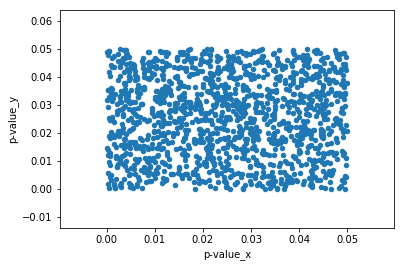

In [183]:
intersect.plot.scatter('p-value_x', 'p-value_y')

Text(0, 0.5, 'Adipose 5 peer factors -log(pvalue)')

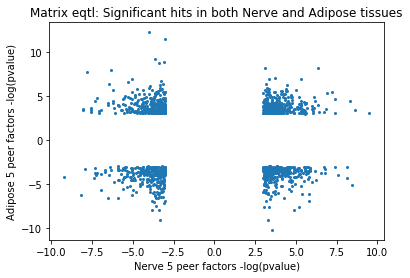

In [27]:
plt.scatter(np.sign(intersect['beta_x'])*-np.log(intersect['p-value_x']), np.sign(intersect['beta_y'])*-np.log(intersect['p-value_y']), s=4)
plt.title('Matrix eqtl: Significant hits in both Nerve and Adipose tissues')
plt.xlabel('Nerve 5 peer factors -log(pvalue)')
plt.ylabel('Adipose 5 peer factors -log(pvalue)')

In [190]:
np.sign(intersect['beta_x'])*-np.log(intersect['p-value_x'])

SNP
chr10_101580387    3.709984
chr10_101580387    3.709984
chr10_101694645    3.452960
chr10_101694645    3.452960
chr10_102415138   -3.085365
                     ...   
chr9_97308069     -4.314807
chr9_97343500     -3.902795
chr9_97922437      3.044122
chr9_98293840      3.794129
chr9_98796327     -3.699187
Length: 1377, dtype: float64

In [30]:
adipose = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/matrixeQTL_PCs_sig_results_pairwise_25factors', sep='\t', index_col=0)
nerve = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/matrixeQTL_PCs_sig_results_pairwise_25factors', sep='\t', index_col=0)
intersect = pd.merge(nerve, adipose, left_index=True, right_index=True)
intersect

,gene_x,beta_x,t-stat_x,p-value_x,FDR_x,gene_y,beta_y,t-stat_y,p-value_y,FDR_y
SNP,,,,,,,,,,
chr10_1000772,V21,0.159836,2.392305,0.017166,0.946242,V8,0.135489,2.059043,0.040032,0.991643
chr10_100152307,V12,0.225361,3.304337,0.001031,0.859855,V9,-0.136639,-2.054890,0.040434,0.991643
chr10_100152307,V12,0.225361,3.304337,0.001031,0.859855,V22,0.134739,2.043328,0.041569,0.991643
chr10_100329906,V6,0.210019,2.191125,0.028972,0.986394,V15,-0.223003,-2.463087,0.014127,0.886491
chr10_100463200,V23,-0.189393,-2.378364,0.017821,0.946242,V12,0.152991,1.978943,0.048397,0.991643
...,...,...,...,...,...,...,...,...,...,...
chr9_99218085,V7,-0.389915,-3.227371,0.001344,0.806819,V5,0.280191,2.428944,0.015511,0.922155
chr9_99218085,V7,-0.389915,-3.227371,0.001344,0.806819,V11,0.230740,2.011438,0.044841,0.978529
chr9_99218085,V11,-0.246458,-2.014433,0.044579,0.971739,V5,0.280191,2.428944,0.015511,0.922155


Text(0, 0.5, 'Adipose 25 peer factors -log(pvalue)')

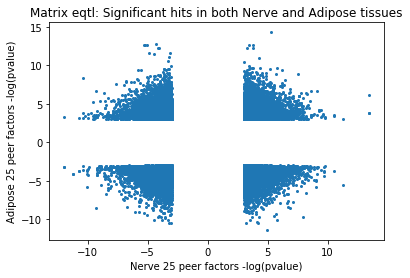

In [31]:
plt.scatter(np.sign(intersect['beta_x'])*-np.log(intersect['p-value_x']), np.sign(intersect['beta_y'])*-np.log(intersect['p-value_y']), s=4)
plt.title('Matrix eqtl: Significant hits in both Nerve and Adipose tissues')
plt.xlabel('Nerve 25 peer factors -log(pvalue)')
plt.ylabel('Adipose 25 peer factors -log(pvalue)')

In [18]:
intersect.sort_values(by=['p-value_x', 'p-value_y'])

,gene_x,beta_x,t-stat_x,p-value_x,FDR_x,gene_y,beta_y,t-stat_y,p-value_y,FDR_y
SNP,,,,,,,,,,
chr19_31277510,V47,-0.510914,-4.953989,0.000001,0.099643,V22,-0.230235,-2.289002,0.022515,0.994302
chr19_31277510,V47,-0.510914,-4.953989,0.000001,0.099643,V38,-0.224587,-2.215274,0.027213,0.994302
chr19_31277510,V47,-0.510914,-4.953989,0.000001,0.099643,V19,-0.197076,-1.970371,0.049374,0.994302
chr17_321307,V10,0.480378,4.838593,0.000002,0.127492,V10,0.306295,3.115331,0.001948,0.862609
chr17_321307,V10,0.480378,4.838593,0.000002,0.127492,V51,0.302369,3.077085,0.002211,0.862609
...,...,...,...,...,...,...,...,...,...,...
chr1_160882036,V38,0.140220,1.965460,0.049997,0.996806,V34,0.143761,2.143030,0.032616,0.963792
chr5_170258159,V28,-0.127039,-1.965441,0.049999,0.986062,V15,0.183648,2.951078,0.003323,0.928248
chr5_170258159,V28,-0.127039,-1.965441,0.049999,0.986062,V24,-0.165897,-2.659021,0.008100,0.928248


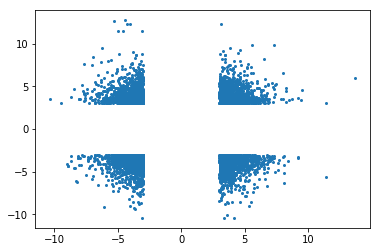

In [15]:
plt.scatter(np.sign(intersect['beta_x'])*-np.log(intersect['p-value_x']), np.sign(intersect['beta_y'])*-np.log(intersect['p-value_y']), s=4)

In [19]:
adipose = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/matrixeQTL_PCs_sig_results_cpma', sep='\t', index_col=0)
nerve = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/matrixeQTL_PCs_sig_results_cpma', sep='\t', index_col=0)


In [12]:
?intersect.sort_values

In [21]:
intersect = pd.merge(nerve, adipose, left_index=True, right_index=True)
# intersect.sort_values

In [13]:
intersect.sort_values(by=['cpma_x', 'cpma_y'], ascending=False)

,cpma_x,pvalue_x,cpma_y,pvalue_y
snp,,,,
chr16_57903952,19951.727017,0.000002,14654.188775,0.000002
chr14_104714369,19288.511720,0.000002,14662.758942,0.000002
chr11_5200415,17882.628012,0.000002,16420.167177,0.000002
chr6_89693121,13243.260650,0.000002,14457.316738,0.000002
chr22_50030478,11544.328700,0.000008,17207.238886,0.000002
chr8_6532368,10260.254518,0.000030,9310.913186,0.000012
chr17_50278899,8799.456687,0.000054,7002.770226,0.000096
chr1_111241360,8549.683542,0.000056,8606.163582,0.000016
chr5_50761895,8349.592879,0.000140,8854.966001,0.000012


Text(0, 0.5, 'Adipose CPMA -log(pvalue)')

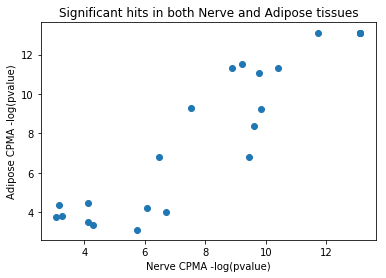

In [22]:
plt.scatter(-np.log(intersect['pvalue_x']), -np.log(intersect['pvalue_y']))
plt.title('Significant hits in both Nerve and Adipose tissues')
plt.xlabel('Nerve CPMA -log(pvalue)')
plt.ylabel('Adipose CPMA -log(pvalue)')

In [3]:
adipose = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/matrixeQTL_PCs_sig_results_pairwise', sep='\t', index_col=0)
nerve = pd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/matrixeQTL_PCs_sig_results_pairwise', sep='\t', index_col=0)


In [4]:
nerve

,gene,beta,t-stat,p-value,FDR
SNP,,,,,
chr1_52854602,ENSG00000166143.9,0.402690,5.785610,1.383015e-08,0.530299
chr1_186304862,ENSG00000196865.4,0.384253,5.515079,5.991230e-08,0.610657
chr1_18849352,ENSG00000204065.2,-0.430280,-5.402971,1.081666e-07,0.610657
chr1_91514890,ENSG00000172780.16,-0.424626,-5.392229,1.144069e-07,0.610657
chr1_156768177,ENSG00000185915.5,0.425842,5.392135,1.144630e-07,0.610657
...,...,...,...,...,...
chr22_30870559,ENSG00000144659.10,-0.135089,-1.965434,4.999978e-02,0.999000
chr22_49961171,ENSG00000118271.9,-0.137189,-1.965434,4.999979e-02,0.999000
chr22_22487881,ENSG00000154473.17,0.215407,1.965433,4.999988e-02,0.999000


In [204]:
nerve

,gene,beta,t-stat,p-value,FDR
SNP,,,,,
chr1_52854602,ENSG00000166143.9,0.402690,5.785610,1.383015e-08,0.530299
chr1_186304862,ENSG00000196865.4,0.384253,5.515079,5.991230e-08,0.610657
chr1_18849352,ENSG00000204065.2,-0.430280,-5.402971,1.081666e-07,0.610657
chr1_91514890,ENSG00000172780.16,-0.424626,-5.392229,1.144069e-07,0.610657
chr1_156768177,ENSG00000185915.5,0.425842,5.392135,1.144630e-07,0.610657
...,...,...,...,...,...
chr22_30870559,ENSG00000144659.10,-0.135089,-1.965434,4.999978e-02,0.999000
chr22_49961171,ENSG00000118271.9,-0.137189,-1.965434,4.999979e-02,0.999000
chr22_22487881,ENSG00000154473.17,0.215407,1.965433,4.999988e-02,0.999000


In [7]:
intersect = nerve.merge(adipose, left_index=True, right_index=True, copy=False)


MemoryError: 

In [2]:
import dask.dataframe as dd

In [10]:
?dd.read_csv

In [3]:
adipose = dd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Adipose-Subcutaneous_Euro/matrixeQTL_PCs_sig_results_pairwise', sep='\t')
nerve = dd.read_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/Nerve-Tibial/matrixeQTL_PCs_sig_results_pairwise', sep='\t')


In [13]:
adipose

,SNP,gene,beta,t-stat,p-value,FDR
npartitions=33,,,,,,
,object,object,float64,float64,float64,float64
,...,...,...,...,...,...
...,...,...,...,...,...,...
,...,...,...,...,...,...
,...,...,...,...,...,...


In [6]:
df = dd.merge(adipose, nerve, how='inner', on=['SNP', 'gene'])

In [17]:
?dd.merge

In [18]:
df

,SNP,gene_x,beta_x,t-stat_x,p-value_x,FDR_x,gene_y,beta_y,t-stat_y,p-value_y,FDR_y
npartitions=33,,,,,,,,,,,
,object,object,float64,float64,float64,float64,object,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [7]:
df.to_csv('/storage/cynthiawu/trans_eQTL/GTex.v8/Run3_070221/nerve_adipose_intersect.tsv', sep='\t', index=False)

ignoring exception in ensure_cleanup_on_exception
Traceback (most recent call last):
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/dask/dataframe/shuffle.py", line 873, in ensure_cleanup_on_exception
    yield
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/dask/dataframe/shuffle.py", line 888, in shuffle_group_3
    p.append(d, fsync=True)
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/partd/encode.py", line 25, in append
    self.partd.append(data, **kwargs)
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/partd/buffer.py", line 45, in append
    self.flush(keys)
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/partd/buffer.py", line 99, in flush
    self.slow.append(dict(zip(keys, self.fast.get(keys))))
  File "/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/partd/file.py", line 44, in append
  

OSError: [Errno 28] No space left on device

In [1]:
?dd.merge

Object `dd.merge` not found.


In [ ]:
df1 = dd.read_csv('file1.csv')
df2 = dd.read_csv('file2.csv')

# Merge the csv files.
df = dd.merge(df1, df2, how='outer', on=['product','version'])

In [ ]:
intersect

In [ ]:
plt.scatter(np.sign(intersect['beta_x'])*-np.log(intersect['p-value_x']), np.sign(intersect['beta_y'])*-np.log(intersect['p-value_y']), s=4)